# Actividad Práctica Sesión 1 Modulo 06

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Importando Datos
df = pd.read_csv('experimento_pan_ES.csv')
df.head()

,participante_id,grupo,tipo_pan,genero,edad,peso_pre_kg,peso_post_kg,ingesta_calorica_kcal,pasos_por_dia,adherencia_dieta_pct,cambio_peso_kg
0,1,Control,Marraqueta,Femenino,46,78.4,78.7,2443,8375,100.0,0.3
1,2,Control,Marraqueta,Femenino,26,77.9,79.0,2254,3307,91.6,1.1
2,3,Control,Marraqueta,Femenino,33,61.4,62.2,2133,7926,92.2,0.8
3,4,Control,Marraqueta,Femenino,31,57.1,57.0,2030,11178,91.6,-0.1
4,5,Control,Marraqueta,Femenino,20,70.7,71.0,2617,11454,92.9,0.3


In [4]:
# Resumen estadístico del dataframe
df.describe()

,participante_id,edad,peso_pre_kg,peso_post_kg,ingesta_calorica_kcal,pasos_por_dia,adherencia_dieta_pct,cambio_peso_kg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,100.500000,42.640000,74.420000,73.949000,2252.165000,7762.375000,91.98350,-0.471000
std,57.879185,14.143926,10.450231,10.564513,310.407121,2487.597926,3.82458,1.185702
min,1.000000,18.000000,48.600000,48.900000,1448.000000,3012.000000,77.20000,-3.800000
25%,50.750000,30.000000,67.800000,67.075000,2060.250000,5699.250000,89.70000,-1.300000
50%,100.500000,42.000000,74.550000,74.450000,2255.000000,7937.500000,91.90000,-0.500000
75%,150.250000,56.000000,81.225000,80.800000,2427.250000,9947.000000,94.50000,0.400000
max,200.000000,65.000000,101.000000,101.400000,3004.000000,11986.000000,100.00000,2.000000


In [5]:
# Se revisan si existen valores nulos
df.isnull().sum()

participante_id          0
grupo                    0
tipo_pan                 0
genero                   0
edad                     0
peso_pre_kg              0
peso_post_kg             0
ingesta_calorica_kcal    0
pasos_por_dia            0
adherencia_dieta_pct     0
cambio_peso_kg           0
dtype: int64

### Análisis Exploratorio

In [6]:
# Promedio de cambio de peso para grupo control y experimental
cambio_peso = df.groupby(['grupo', 'tipo_pan', 'genero'])['cambio_peso_kg'].mean().reset_index()
cambio_peso

,grupo,tipo_pan,genero,cambio_peso_kg
0,Control,Marraqueta,Femenino,0.463462
1,Control,Marraqueta,Masculino,0.408333
2,Experimental,Pan Integral,Femenino,-1.251111
3,Experimental,Pan Integral,Masculino,-1.483636


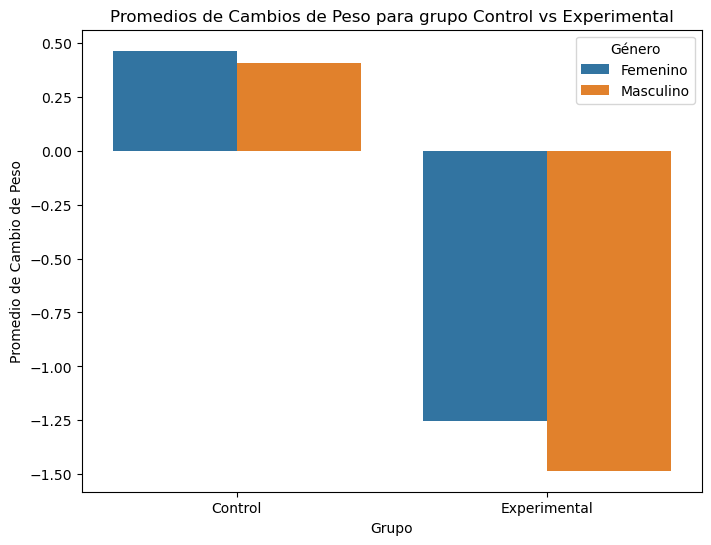

In [7]:
# Gráfico promedios de cambios de peso para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=cambio_peso, x='grupo', y='cambio_peso_kg', hue='genero')
plt.title("Promedios de Cambios de Peso para grupo Control vs Experimental")
plt.ylabel("Promedio de Cambio de Peso")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

Se observa que el grupo experimental que consumio pan integral, tuvo en promedio una baja de peso tanto en hombres como en mujeres, contrario a lo que ocurrio con el grupo control que tanto en mujeres como hombres experimentaron en promedio una subida de peso, lo que en primeria instacia nos arroja, que existe una relación entre el peso y el tipo de pan que se consume. 

In [8]:
# Promedio de pasos por día para grupo control y experimental
pasos_por_dia = df.groupby(['grupo', 'tipo_pan', 'genero'])['pasos_por_dia'].mean().reset_index()
pasos_por_dia

,grupo,tipo_pan,genero,pasos_por_dia
0,Control,Marraqueta,Femenino,8169.634615
1,Control,Marraqueta,Masculino,7820.250000
2,Experimental,Pan Integral,Femenino,7897.933333
3,Experimental,Pan Integral,Masculino,7215.909091


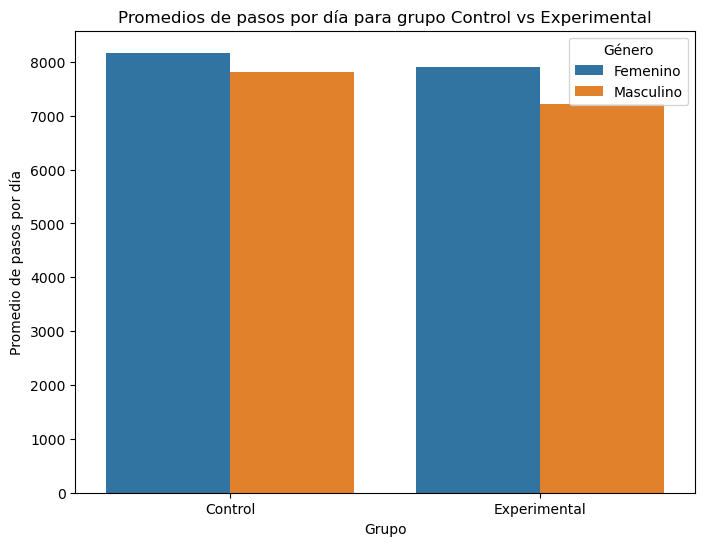

In [9]:
# Grafico promedios de pasos por día para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=pasos_por_dia, x='grupo', y='pasos_por_dia', hue='genero')
plt.title("Promedios de pasos por día para grupo Control vs Experimental")
plt.ylabel("Promedio de pasos por día")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

En cuanto a la variable "pasos por día", que es otra variable que podría determinar la baja o no de peso, podemos notar que el grupo control tuvo en promedio más movilidad que grupo experimental, lo que nos índica que esta no sería una variable que explicaría el baja de peso del grupo experimental, ya que pese a que en promedio tuvieron una menor cantidad de pasos por día, aún así presentaron una baja en el peso.

In [10]:
# Promedio de ingesta calorica para grupo control y experimental
ingesta_calorica = df.groupby(['grupo', 'tipo_pan', 'genero'])['ingesta_calorica_kcal'].mean().reset_index()
ingesta_calorica

,grupo,tipo_pan,genero,ingesta_calorica_kcal
0,Control,Marraqueta,Femenino,2350.730769
1,Control,Marraqueta,Masculino,2342.854167
2,Experimental,Pan Integral,Femenino,2150.955556
3,Experimental,Pan Integral,Masculino,2162.636364


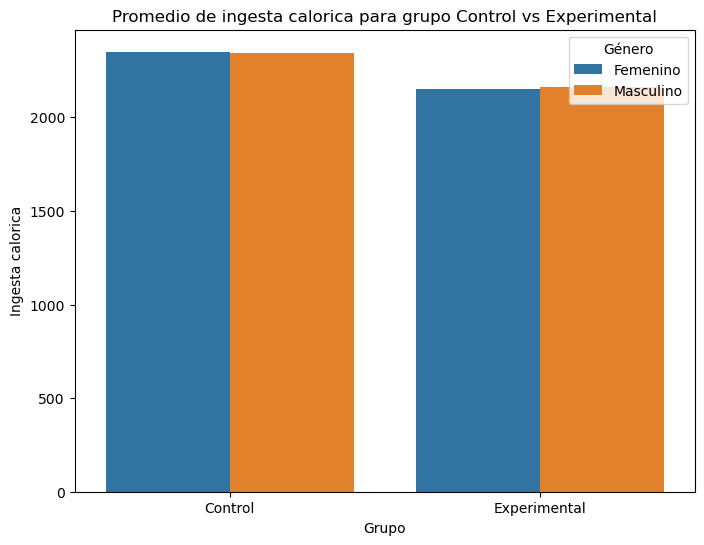

In [11]:
# Grafico promedios de ingesta calorica para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=ingesta_calorica, x='grupo', y='ingesta_calorica_kcal', hue='genero')
plt.title("Promedio de ingesta calorica para grupo Control vs Experimental")
plt.ylabel("Ingesta calorica")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

En cuanto a la ingesta promedio de calorías por día, se observa que el grupo control, presenta un promedio mayor de ingesta que el grupo experimental, lo que podría explicar el por que este grupo presento un aumento de peso, y el grupo experimental una baja. 

Ahora esta diferencia en la ingesta calorica por día del grupo control respecto al experimental, también se podría deber a que el grupo control consumia pan marraqueta, la cual debería aportar más colorias que el pan integral consumido por el grupo experimental, por lo que es una variable a analizar con más detenimiento. 

In [12]:
# Promedio de adherencia a dieta para grupo control y experimental
adherencia_dieta = df.groupby(['grupo', 'tipo_pan', 'genero'])['adherencia_dieta_pct'].mean().reset_index()
adherencia_dieta

,grupo,tipo_pan,genero,adherencia_dieta_pct
0,Control,Marraqueta,Femenino,91.817308
1,Control,Marraqueta,Masculino,91.966667
2,Experimental,Pan Integral,Femenino,91.295556
3,Experimental,Pan Integral,Masculino,92.718182


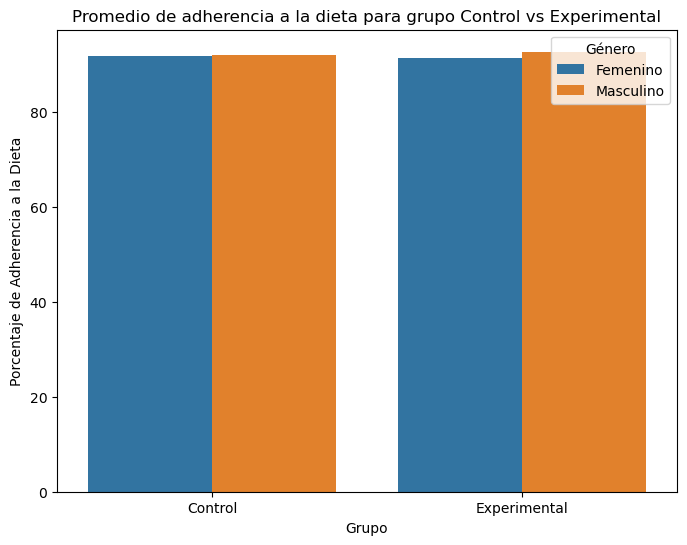

In [13]:
# Grafico de adherencia a la dieta para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=adherencia_dieta, x='grupo', y='adherencia_dieta_pct', hue='genero')
plt.title("Promedio de adherencia a la dieta para grupo Control vs Experimental")
plt.ylabel("Porcentaje de Adherencia a la Dieta")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

Finalmente respecto a la variable de adherencia a la dieta, se constata que ambos grupos presentaron un porcentaje similar de adherencia, por lo que se podría deducir que no es una variable que habría influido en la subida y bajada de peso de uno y otro grupo. 

### Prueba t de student para grupo control vs grupo experimental

In [14]:
# Prueba t de student para ver la significancia estadística entre las diferencias de medias para los grupos control y experimental
df_control = df[df['grupo'] == 'Control']
df_experimental = df[df['grupo'] == 'Experimental']

grupo_control = df_control['cambio_peso_kg']
grupo_experimental = df_experimental['cambio_peso_kg']

t_stat, p_valor = ttest_ind(grupo_control, grupo_experimental)
print("#### MEDIAS EN EL CAMBIO DE PESO #####")
print(f"Media del cambio de peso para el grupo control: {df_control['cambio_peso_kg'].mean():.2f}")
print(f"Media del cambio de peso para el grupo experimental: {df_experimental['cambio_peso_kg'].mean():.2f}\n")

print("#### PRUEBA T DE STUDENT #####")
print(f"Valor t: {t_stat:.2f}")
print(f"p-valor: {p_valor:.4f}")

#### MEDIAS EN EL CAMBIO DE PESO #####
Media del cambio de peso para el grupo control: 0.44
Media del cambio de peso para el grupo experimental: -1.38

#### PRUEBA T DE STUDENT #####
Valor t: 16.86
p-valor: 0.0000


Luego de observar que el grupo control (que consumió marraqueta) presentó un aumento promedio de 0.44 kg, y el grupo experimental (que consumió pan integral) tuvo una disminución promedio de 1.38 kg en su peso corporal, se aplicó una prueba t de Student para determinar si esta diferencia es estadísticamente significativa.

La prueba arrojó un valor t = 16.86 y un p-valor < 0.0001, lo que indica que la diferencia observada no es producto del azar. Por lo tanto, se rechaza la hipótesis nula, concluyendo que el tipo de pan consumido si influye en el cambio de peso.

### Correlaciones de las variables númericas para el grupo control y experimental

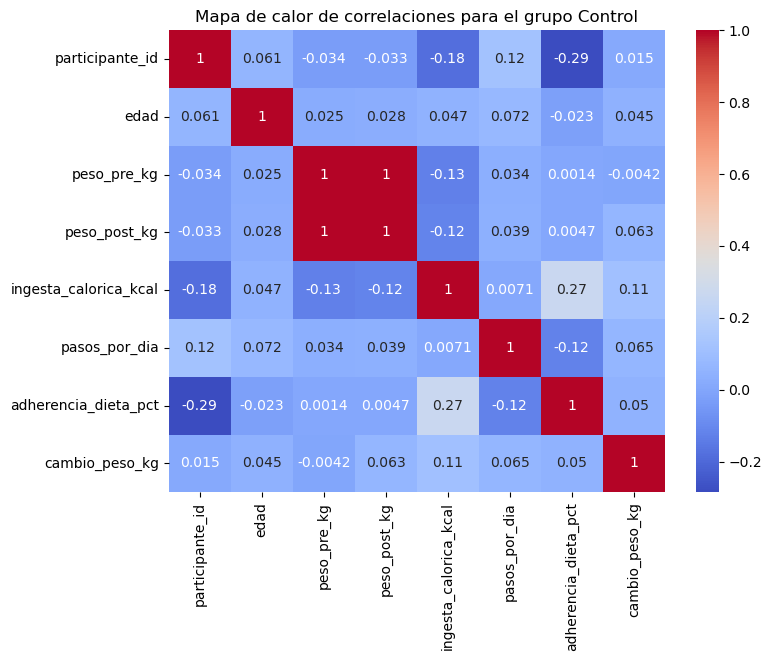

In [15]:
# Grafico de correlaciones para grupo control
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_control.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlaciones para el grupo Control') 
plt.show()

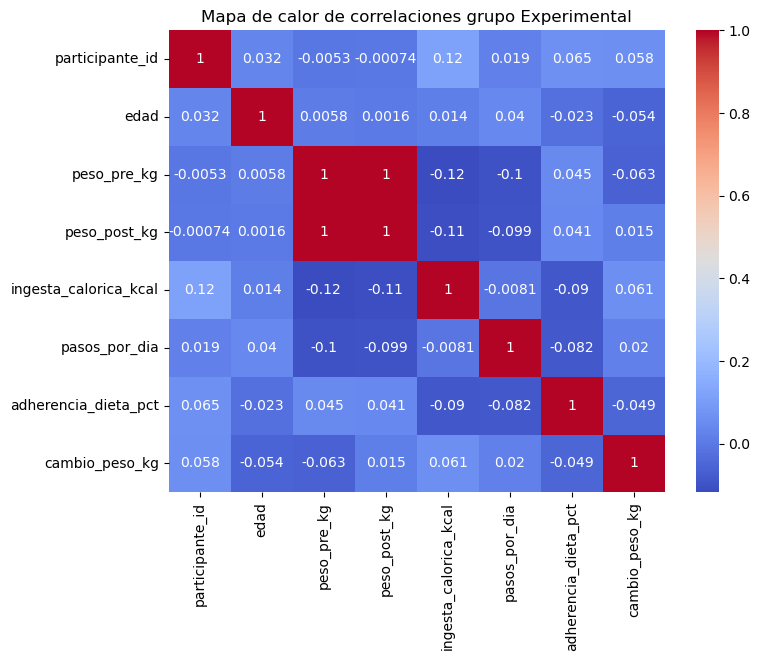

In [16]:
# Grafico de correlaciones para grupo experimental
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_experimental.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlaciones grupo Experimental')
plt.show()

Los mapas de calor de correlaciones para las variables numéricas, tanto en el grupo control como en el experimental, muestran que ninguna de estas presenta una correlación fuerte con la variable 'cambio de peso'. Esto sugiere que dichas variables no serían buenos predictores del cambio de peso en este contexto. En contraste, la diferencia significativa entre los grupos según el tipo de pan consumido refuerza la hipótesis de que este factor es el principal determinante del cambio observado en el peso corporal.

### Conclusiones

Finalmente, podemos concluir que en el experimento presentado, el consumo de pan integral en lugar de marraqueta tendría un impacto significativo en el cambio de peso corporal. Se observa una diferencia promedio de 1.82 kilos entre ambos grupos durante el periodo evaluado, presentando el grupo que consumió marraqueta un aumento de 0.44 kilos de peso, mientras que el grupo que consumió pan integral registró una reducción de 1.38 kilos.

Adicionalmente, se analizaron otras variables que podrían haber influido en el cambio de peso, como la ingesta calórica, los pasos diarios, la edad y la adherencia a la dieta, y ninguna de ellas mostró una correlación significativa con la variable de cambio de peso, tanto en el grupo control como en el experimental.

Por lo tanto, respaldados en los resultados de la prueba t de Student, la cual arrojó una diferencia estadísticamente significativa entre las medias de ambos grupos, podemos rechazar la hipótesis nula y apoyar la hipótesis de que el tipo de pan consumido influye en el cambio de peso corporal.